# ELEC 474 Prelab 3
Matthieu Roux, 20013052

In [19]:
import numpy as np
import cv2

spiral_url = "spiral.jpg"
lines_url = "lines.jpg"
custom_image_url = "custom_image.png"

img_path = lines_url

img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)

img_height = img.shape[0]
img_width = img.shape[1]

## 1 General Edge Detection

### 1.1 Smooth img using the GaussianBlur() method


In [20]:
img = cv2.GaussianBlur(src=img, ksize=(0, 0), sigmaX=2)

### 1.2 and 1.3 Sobel’s Edge Detection Masks


In [21]:
def sobel_edge_detection(img):
    sobel_x_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y_filter = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    sobel_x = cv2.filter2D(img, 5, sobel_x_filter)
    sobel_y = cv2.filter2D(img, 5, sobel_y_filter)
    return sobel_x, sobel_y


i_x, i_y = sobel_edge_detection(img)

### 1.4 Get the Gradient Magnitude G(i,j) of the image by combining `i_x` and `i_y`


In [22]:
def gradient_magnitude(i_x, i_y):
    gradient_magnitude = np.zeros(img.shape)
    for index in np.ndindex(img.shape):
        gradient_magnitude[index] = abs(i_x[index]) + abs(i_y[index])
    gradient_magnitude *= 255 / np.amax(gradient_magnitude)
    return gradient_magnitude.astype(np.uint8)


gm = gradient_magnitude(i_x, i_y)


### 1.5 Thresholding

In [23]:
threshold = 18


def apply_threshold(img, threshold):
    output_img = (img > threshold) * 255
    return output_img.astype(np.uint8)


### Rendering and running Part 1

In [24]:
# reset all is used to reset the image
def reset_all():
    global img
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)


# Rendering
window_name = "global"
cv2.namedWindow(window_name)

# on_trackbar is called when the trackbar is changed, it updates the threshold
def on_trackbar(val):
    global threshold, img_sober, gm
    threshold = val
    img_sober = apply_threshold(gm, threshold)


img_sober = apply_threshold(gm, threshold)

# create trackbar
cv2.createTrackbar("Threshold", window_name, threshold, 255, on_trackbar)
while True:
    # Wait a little bit for the image to re-draw
    key = cv2.waitKey(5)
    cv2.imshow(window_name, img_sober)

    # If an x is pressed, the window will close
    if key == ord("x"):
        break
cv2.destroyAllWindows()

## Part 2: Canny Edges Detection

In [25]:
threshold_low = 50
threshold_hi = 150


def on_trackbar_low(val):
    global threshold_low, img_canny
    if val > threshold_hi:
        threshold_low = threshold_hi - 1
    else:
        threshold_low = val
    img_canny = canny_edge_detection(img)


def on_trackbar_hi(val):
    global threshold_hi, img_canny
    if val < threshold_low:
        threshold_hi = threshold_low + 1
    else:
        threshold_hi = val
    img_canny = canny_edge_detection(img)


def canny_edge_detection(img):
    return cv2.Canny(img, threshold1=threshold_low, threshold2=threshold_hi)


# Rendering
window_name = "canny"
cv2.namedWindow(window_name)

reset_all()
img_canny = canny_edge_detection(img)
cv2.createTrackbar("Low Threshold", window_name, threshold_low, 255, on_trackbar_low)
cv2.createTrackbar("High Threshold", window_name, threshold_hi, 255, on_trackbar_hi)

while True:
    # Wait a little bit for the image to re-draw
    key = cv2.waitKey(5)
    cv2.imshow(window_name, img_canny)

    # If an x is pressed, the window will close
    if key == ord("x"):
        break
cv2.destroyAllWindows()

In [26]:
# run this if you are having issues with closing the windows (happens to me sometimes)
cv2.destroyAllWindows()

## 3. Comparison of General and Canny Edge Detectors

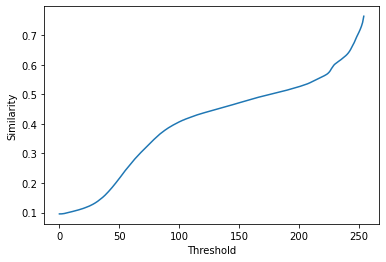

In [27]:
def get_difference_ratio(img1, img2):
    img_mask = img1 == img2
    number_of_pixels = img1.shape[0] * img1.shape[1]
    return sum(sum(img_mask)) / number_of_pixels

similarity_arr = [get_difference_ratio(img_canny, apply_threshold(img, threshold)) for threshold in range(255)]

import matplotlib.pyplot as plt
plt.plot(similarity_arr)
plt.ylabel('Similarity')
plt.xlabel('Threshold')
plt.show()